load data 

In [2]:
import pandas as pd


connect data


In [5]:
pip install fsspec

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:



train=pd.read_csv("C://Users//muzri//Documents//module4 mechine learning//feature engeering//titanic surviver data cleaning//datas//train.csv")

display first 5 rows

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#check data type of each column
print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


option 2- use select_dtypes

In [7]:
#numerical columns
numerical_cols=train.select_dtypes(include=["int64","float64"]).columns
print(numerical_cols)
#categarical columns
categarical_cols=train.select_dtypes(include=["object"]).columns
print(categarical_cols)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')
Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [9]:
#count missing values for each columns
missing_values=train.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Heatmap in Data Science
What is a Heatmap?

A heatmap is a data visualization technique that shows values using colors.

Instead of numbers, it represents data intensity using shades (light ↔ dark).

It’s very useful in EDA (Exploratory Data Analysis) to quickly spot patterns, correlations, or missing data.


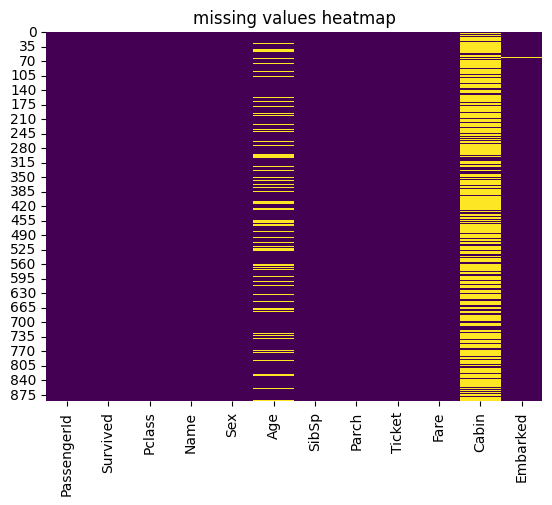

In [10]:
#visualisation through heat map
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(train.isnull(),cbar=False,cmap="viridis")
plt.title("missing values heatmap")
plt.show()

Heatmap of Missing Values

 Helps you see where data is missing.
#Columns like Age and Fare are numerical → can fill missing values #with median/mean.
Yellow = missing values, Purple = non-missing values.

#Columns like Embarked and Cabin are categorical → can fill with #mode or drop if too many missing values.


Handle missing values
Objective: Make data complete for modelling
#Fill missing age with median
#Fill missing Embarked with mode.
#Fill missing Fare in test set with median.
#Drop Cabin (too many missing values).


Handle missing values
Objective: Make data complete for modelling
#Fill missing age with median
#Fill missing Embarked with mode.


In [11]:
train["Age"].fillna(train["Age"].median(),inplace=True)
train["Embarked"].fillna(train["Embarked"].mode()[0],inplace=True)

C:\Users\muzri\AppData\Local\Temp\ipykernel_29668\1804593821.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].median(),inplace=True)
C:\Users\muzri\AppData\Local\Temp\ipykernel_29668\1804593821.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

drop cabin (too many missing values)

In [16]:
train.drop("Cabin",axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [17]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

step3- feature creation
Objective: Generate meaningful features from existing ones.
Create FamilySize = SibSp + Parch + 1
Looks at rows where FamilySize > 1 (meaning the passenger is not alone).

For those rows, it sets IsAlone = 0.
Create IsAlone = 1 if FamilySize==1 else 0


In [20]:
train["FamilySize"]=train["SibSp"]+train["Parch"]


In [23]:
train["IsAlone"]=1
train.loc[train["FamilySize"]>1,"IsAlone"]=0
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,1


train['Name'] → contains names like "Braund, Mr. Owen Harris"

.str.extract(' ([A-Za-z]+)\.', expand=False) → uses a regex to pull out words ending with a dot (e.g., "Mr.", "Mrs.", "Miss.", "Master.")
bcc-xspc-fdn

In [24]:
train["title"]=train["Name"].str.extract("([A-Za-z]+)\.",expand=False)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\muzri\AppData\Local\Temp\ipykernel_29668\189986131.py:1: SyntaxWarning: invalid escape sequence '\.'
  train["title"]=train["Name"].str.extract("([A-Za-z]+)\.",expand=False)


In [26]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,1,Mrs


know unique values

In [28]:
s=(train["title"].unique())

In [29]:
rare_title=[i for i in s if i not in ["Mr","Mrs","Miss","Master"]]
print(rare_title)

['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer']


In [30]:
train["title"]=train["title"].replace(rare_title,"Rare")
print(train["title"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [31]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,0,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,0,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,4,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,2,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,1,1,Mrs


Step 4: Encode Categorical Variables
Objective: Convert text data into numbers for ML models.
Convert Sex → 0 (male), 1 (female)


In [32]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'IsAlone',
       'title'],
      dtype='object')


In [34]:
print(train["Sex"].isnull().sum())
print(train["Sex"].unique())

0
['male' 'female']


In [ ]:
train["Sex"]=train["Sex"].map({"male": 0,"female": 1})
print(train["Sex"].unique())

[0 1]


In [37]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,1,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,1,Mr
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,Q,0,1,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S,0,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S,4,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S,2,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C,1,1,Mrs


What is One-Hot Encoding?

One-hot encoding converts categorical values (like "C", "Q", "S") into separate binary columns (0/1).

Each unique category becomes its own column.

The column has 1 if that row belongs to the category, otherwise 0.
| PassengerId | Embarked |
| ----------- | -------- |
| 1           | S        |
| 2           | C        |
| 3           | Q        |
| 4           | S        |
After one-hot encoding, it becomes:
| PassengerId | Embarked\_C | Embarked\_Q | Embarked\_S |
| ----------- | ----------- | ----------- | ----------- |
| 1           | 0           | 0           | 1           |
| 2           | 1           | 0           | 0           |
| 3           | 0           | 1           | 0           |
| 4           | 0           | 0           | 1           |
Why is it useful?

Machine learning models need numeric input.

One-hot encoding avoids giving categories an artificial order (e.g., C=1, Q=2, S=3 would wrongly imply Q > C).

It makes each category independent.

In [38]:
train=pd.get_dummies(train,columns=["Embarked"],dtype=int)

In [39]:
train.head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,title,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1,1,Mr,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,Mrs,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,Miss,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,1,Mrs,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,Mr,0,0,1
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,0,1,Mr,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,0,1,Mr,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,4,0,Master,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,2,0,Mrs,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1,1,Mrs,1,0,0


map title to numbers

In [40]:
print(train["title"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [41]:
title_mapping={"Mr":1,"Mrs":2,"Miss":3,"Master":4,"Rare":5}
train["title"]=train["title"].map(title_mapping)

In [42]:
print(train["title"].unique())

[1 2 3 4 5]


In [43]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,IsAlone,title,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1,1,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,2,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,3,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,1,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1,1,0,0,1
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,0,1,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,0,1,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,4,0,4,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,2,0,2,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,1,1,2,1,0,0


drop irrelevant columns
objectives - keep only useful features


In [44]:
train.drop(["Ticket","Name"],axis=1,inplace=True)

step 7 
save cleaned data

In [45]:
train.to_csv("C://Users//muzri//Documents//module4 mechine learning//feature engeering//titanic surviver data cleaning//datas//clean_train.csv",index=False)